# <center>Otsu’s thresholding</center> 

In [1]:
#Import libraries
from pylab import *
import cv2

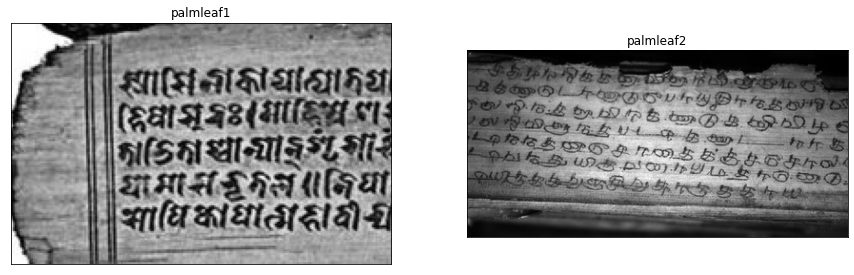

In [2]:
#Load image
src1 = cv2.imread('palmleaf1.pgm',0)
src2 = cv2.imread('palmleaf2.pgm',0)

src1 = src1.astype(float)
src2 = src2.astype(float)


# View images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(src1,'gray')
ax1.set_title('palmleaf1')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(src2,'gray')
ax2.set_title('palmleaf2')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()

# Global Thresholding Using Otsu's Method 
Implement Otsu's method for binary thresholding of binary images. Say an image has $L$ possible intensity levels. We choose a threshold $t$ to segment the image into two parts. Clearly

$$
0\leq t\leq L-1
$$

Let $F_{i}$ represent the number of times intensity $i$ occurs in the image. Define class 1 ($C_{1}$) as the set of pixels satisfying $\{i : 0\leq i \leq t\}$ and class 2 ($C_{2}$) as the set of pixels satisfying $\{i : t< i \leq L-1\}$. Let the number of pixels in $C_{1}$ and $C_{2}$ be $N_{1}$ and $N_{2}$ respectively. The means and variances of class $j$, $\mu_{j}$ and $\sigma_{j}^{2}$, are defined as

$$
\mu_{j} = \frac{\Sigma_{i\in C_{j}}iF_{i}}{N_{j}}
$$

$$
\sigma^{2}_{j} = \frac{\Sigma_{i \in C_{j}}(i-\mu_{j})^{2}F_{i}}{N_{j}}
$$

Also, the means and variances of the entire image, $\mu_{G}$ and $\sigma^{2}_{G}$, are defined as

$$
\mu_{G} = \frac{\Sigma_{i=0}^{L-1}iF_{i}}{N}
$$

$$
\sigma^{2}_{G} = \frac{\Sigma_{i=0}^{L-1}(i-\mu_{G})^{2}F_{i}}{N}
$$

$N$ is the total number of pixels in the image.

The within class variance, $\sigma^{2}_{w}$, is defined as

$$
\sigma^{2}_{w} = \frac{\Sigma_{j=1}^{2}\sigma_{j}^{2}N_{j}}{N}
$$

The between class variance, $\sigma_{b}^{2}$ is defined as 

$$
\sigma^{2}_{b} = \frac{\Sigma_{j=1}^{2}(\mu_{j}-\mu_{G})^{2}N_{j}}{N}
$$

It is clear that the terms defined above are functions of $t$. $t$ has been skipped for notational brevity. It can be shown that the between class variance can be rewritten as 

$$
\sigma^{2}_{b} = \frac{(\mu_{G}P_{1}-m)^{2}}{P_{1}(1-P_{1})}
$$

$P_{1}$ and $m$ are given as

$$
P_{1} = \frac{N_{1}}{N}
$$

$$
m = \frac{\Sigma_{i\in C_{1}}iF_{i}}{N} = \frac{\mu_{1}N_{1}}{N}
$$

The complete derivation can be found in section 10.3.3 of Digital Image Processing, Third Edition by Rafael C. Gonzalez and Richard E. Woods.
The optimal threshold $t^{*}$ from Otsu's method is given by

$$
t^{*} = argmax_{0\leq t \leq L-1} \sigma^{2}_{b}(t) = argmin_{0\leq t \leq L-1} \sigma^{2}_{w}(t)
$$

In [3]:
def gthres(F,L) :
    nL = np.arange(0,L)
    N = sum(F)
    muT = (sum(nL*F))/N
    sigwin = []
    siginb = []
    for t in range(0,L) :
        #Find parameters
        N1 = sum(F[:t+1])
        N2 = sum(F[t+1:])
        mu1 = (sum(nL[:t+1]*F[:t+1]))/N1
        mu2 = (sum(nL[t+1:]*F[t+1:]))/N2
        sig1 = (np.sum(((nL[:t+1]-mu1)**2)*F[:t+1]))/N1
        sig2 = (np.sum(((nL[t+1:]-mu2)**2)*F[t+1:]))/N2
        sigval1 = (sig1*N1 + sig2*N2)/N
        sigwin.append(sigval1)
        sigval2 = ((mu1-muT)*(mu1-muT)*N1 + (mu2-muT)*(mu2-muT)*N2)/N
        siginb.append(sigval2)
    #Find min threshold
    gthres = np.where(sigwin == min(sigwin))[0]  ##  sigma of within class 
    #gthres = np.where(siginb == max(siginb))[0]  ## sigm OF in between class 
    
    """
    #Plot the sigma values
    plt.bar(nL,sigwin)
    plt.title("Minima plot of within class sigma")
    plt.xlabel("Threshold")
    plt.ylabel("Within class sigma")
    plt.show()
    """
    return gthres , nL , sigwin
       
#Obtain intensity frequency
L = 256
F1 = []
F2 = []
for i in range(0,L) :
    ind1 = np.where(src1 == i)[0]
    ind2 = np.where(src2 == i)[0]
    F1.append(len(ind1))
    F2.append(len(ind2))
    
F1 = array(F1)
F2 = array(F2)

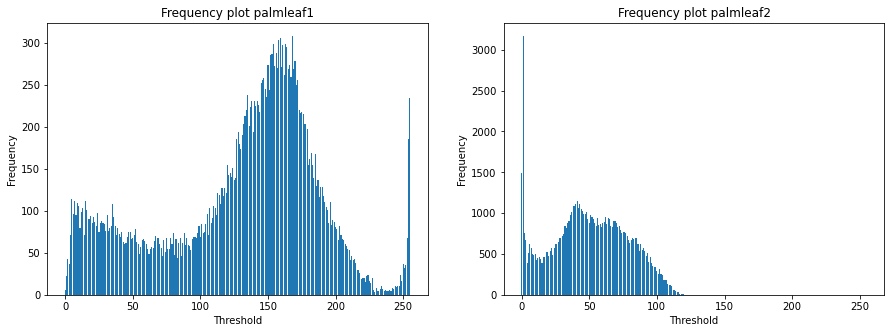

In [4]:
#Frequency plots    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.bar(range(0,L),F1)
ax1.set_title("Frequency plot palmleaf1")
ax1.set_xlabel('Threshold')
ax1.set_ylabel("Frequency")

ax2.bar(range(0,L),F2)
ax2.set_title("Frequency plot palmleaf2")
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Frequency")
plt.show()


C:\Users\ABDULW~1\AppData\Local\Temp/ipykernel_17376/1674018448.py:12: RuntimeWarning: invalid value encountered in long_scalars
  mu2 = (sum(nL[t+1:]*F[t+1:]))/N2
C:\Users\ABDULW~1\AppData\Local\Temp/ipykernel_17376/1674018448.py:14: RuntimeWarning: invalid value encountered in double_scalars
  sig2 = (np.sum(((nL[t+1:]-mu2)**2)*F[t+1:]))/N2


[104] [50]


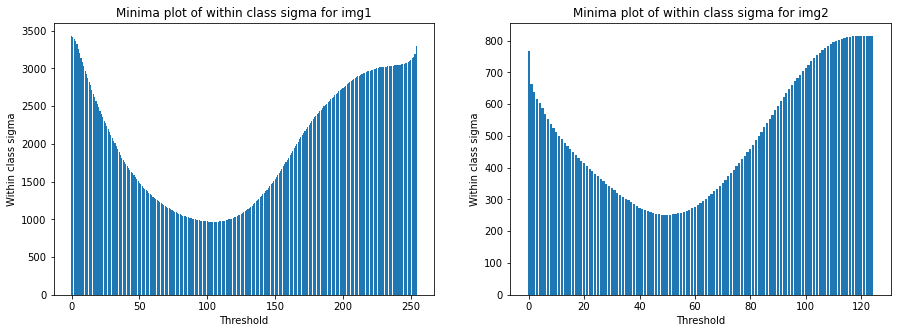

In [5]:
#Thresholded pictures
t1, nL1, sigwin1 = gthres(F1,L)
t2, nL2, sigwin2 = gthres(F2,L)
print(t1,t2)

#Plot the sigma values
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.bar(nL1,sigwin1)
ax1.set_title("Minima plot of within class sigma for img1")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Within class sigma")

ax2.bar(nL2,sigwin2)
ax2.set_title("Minima plot of within class sigma for img2")
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Within class sigma")
plt.show()

thresimg1 = np.zeros(shape(src1))
thresimg2 = np.zeros(shape(src2))

ind1 = np.where(src1 <= t1)
ind2 = np.where(src1 > t1)
thresimg1[ind1] = 0
thresimg1[ind2] = 1

ind1 = np.where(src2 <= t2)
ind2 = np.where(src2 > t2)
thresimg2[ind1] = 0
thresimg2[ind2] = 1

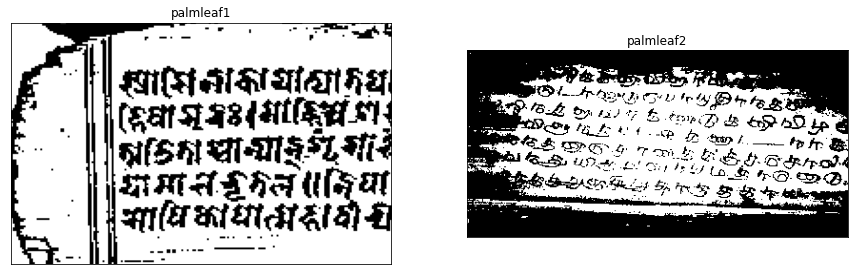

In [6]:
# View images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(thresimg1,'gray')
ax1.set_title('palmleaf1')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(thresimg2,'gray')
ax2.set_title('palmleaf2')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()

# Observations
The following observations can be made.
- Otsu's method does a fairly good job at binarizing both the images.
- It does quite a bit better in binarizing $\texttt{palmleaf1.pgm}$ compared to $\texttt{palmleaf2.pgm}$. This can probably be attributed to the fact the illumination in the former is much more uniform.